# Playground for Advanced Topics Slides

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, and GMMA 869

In [1]:
import datetime
print(datetime.datetime.now())

2020-10-06 11:36:03.909316


In [2]:
import sklearn
sklearn.__version__

'0.23.1'

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Data

In [4]:
df = pd.read_csv('../data/GermanCredit.csv')
df['Class'] = df['Class'].map({'Good': 1, 'Bad': 0})
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Duration                                1000 non-null   int64
 1   Amount                                  1000 non-null   int64
 2   InstallmentRatePercentage               1000 non-null   int64
 3   ResidenceDuration                       1000 non-null   int64
 4   Age                                     1000 non-null   int64
 5   NumberExistingCredits                   1000 non-null   int64
 6   NumberPeopleMaintenance                 1000 non-null   int64
 7   Telephone                               1000 non-null   int64
 8   ForeignWorker                           1000 non-null   int64
 9   Class                                   1000 non-null   int64
 10  CheckingAccountStatus.lt.0              1000 non-null   int64
 11  CheckingAccountSta

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,1,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,0,1,0,0,1,0,0,1,0


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis=1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering

## Feature Scaling

In [6]:
from sklearn import preprocessing

X = df[['Amount']].copy()

scaler = preprocessing.StandardScaler().fit(X[['Amount']])
X['Amount_Scaled'] = scaler.transform(X[['Amount']])   

scaler = preprocessing.MinMaxScaler().fit(X[['Amount']])
X['Amount_MinMax'] = scaler.transform(X[['Amount']])   

scaler = preprocessing.PowerTransformer(method='box-cox').fit(X[['Amount']])
X['Amount_BoxCox'] = scaler.transform(X[['Amount']])   

scaler = preprocessing.PowerTransformer(method='yeo-johnson').fit(X[['Amount']])
X['Amount_YeoJohnson'] = scaler.transform(X[['Amount']])  

scaler = preprocessing.QuantileTransformer(random_state=0).fit(X[['Amount']])
X['Amount_Uniform'] = scaler.transform(X[['Amount']])  

scaler = preprocessing.FunctionTransformer(np.log1p, validate=True).fit(X[['Amount']])
X['Amount_Log'] = scaler.transform(X[['Amount']])  

type(X)
X.head()


pandas.core.frame.DataFrame

,Amount,Amount_Scaled,Amount_MinMax,Amount_BoxCox,Amount_YeoJohnson,Amount_Uniform,Amount_Log
0,1169,-0.745131,0.050567,-0.932601,-0.932701,0.154655,7.064759
1,5951,0.949817,0.313690,1.156740,1.156805,0.846847,8.691483
2,2096,-0.416562,0.101574,-0.157834,-0.157831,0.448448,7.648263
3,7882,1.634247,0.419941,1.496003,1.496009,0.927928,8.972464
4,4870,0.566664,0.254209,0.910973,0.911056,0.810811,8.491055


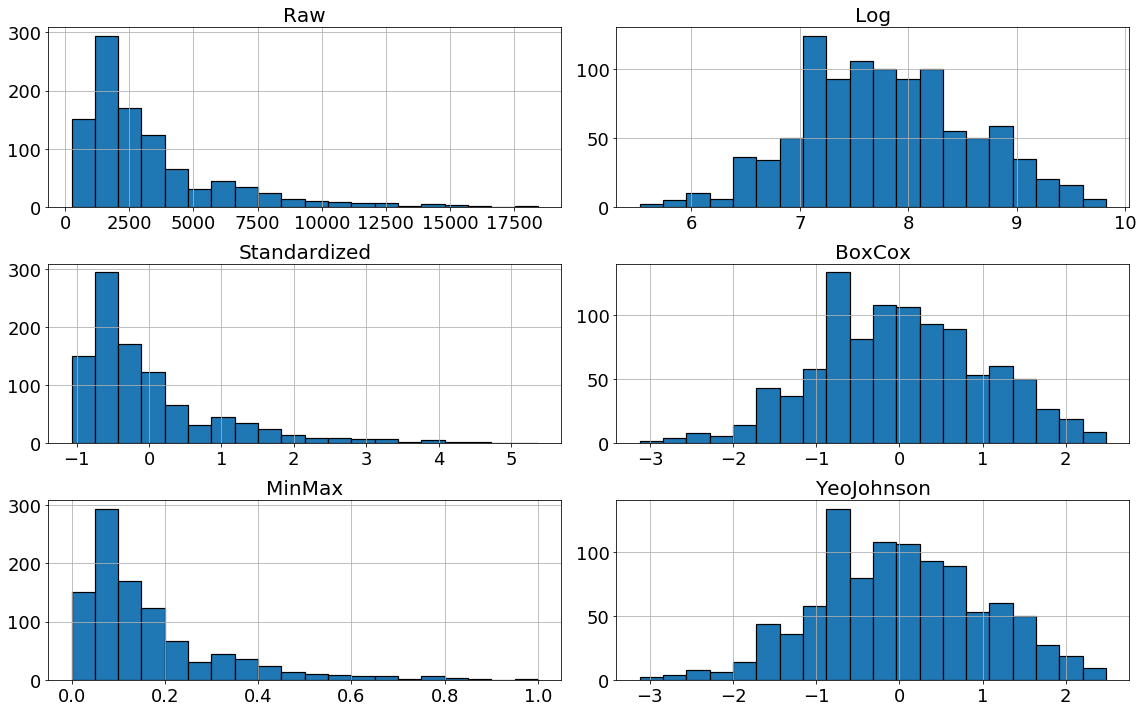

In [7]:
def plot_hist(ax, feature, title):
    ax.hist(feature, bins=20, edgecolor='black', linewidth=1.2);
    ax.set_title(title, fontsize=20);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);

plt.figure(figsize=(16, 10));
plt.grid(True);
plot_hist(plt.subplot(3, 2, 1), X['Amount'], 'Raw')
plot_hist(plt.subplot(3, 2, 2), X['Amount_Log'], 'Log')
plot_hist(plt.subplot(3, 2, 3), X['Amount_Scaled'], 'Standardized')
plot_hist(plt.subplot(3, 2, 4), X['Amount_BoxCox'], 'BoxCox')
plot_hist(plt.subplot(3, 2, 5), X['Amount_MinMax'], 'MinMax')
plot_hist(plt.subplot(3, 2, 6), X['Amount_YeoJohnson'], 'YeoJohnson')



#plt.title('Amount', fontsize=20)
plt.tight_layout();
#plt.savefig('out/german_credit-transforms.png');

## Binning

In [8]:
# TODO

# Categorical Features

## One Hot Encoding

In [9]:
# TODO

## Contrasts

In [10]:
from sklearn.model_selection import train_test_split

X = df.copy()
y = X[['Class']]
X = X.drop(['Class'], axis=1)

y['Class'] = y['Class'].map({'Good': 1, 'Bad': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape
X_test.shape

(800, 61)

(200, 61)

# Aggregations

In [11]:
import featuretools as ft

# Let's load a different kind of dataset - one that has lots of transactions

es = ft.demo.load_mock_customer(return_entityset=True)
es

Entityset: transactions
  Entities:
    transactions [Rows: 500, Columns: 5]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 4]
    customers [Rows: 5, Columns: 4]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id
    sessions.customer_id -> customers.customer_id

In [12]:
es["transactions"].df.head(30)

,transaction_id,session_id,transaction_time,amount,product_id
298,298,1,2014-01-01 00:00:00,127.64,5
2,2,1,2014-01-01 00:01:05,109.48,2
308,308,1,2014-01-01 00:02:10,95.06,3
116,116,1,2014-01-01 00:03:15,78.92,4
371,371,1,2014-01-01 00:04:20,31.54,3
486,486,1,2014-01-01 00:05:25,23.76,3
271,271,1,2014-01-01 00:06:30,43.63,3
192,192,1,2014-01-01 00:07:35,42.27,4
341,341,1,2014-01-01 00:08:40,47.68,3
10,10,1,2014-01-01 00:09:45,57.39,5


In [13]:
feature_matrix, features = ft.dfs(entityset=es,
                                   target_entity="customers",
                                   verbose=True)
feature_matrix

Built 73 features
Elapsed: 00:00 | Remaining: 00:00 | Progress: 100%|██████████████████████████████████████████████████████████████████████████████████████| Calculated: 1/1 chunks


,zip_code,COUNT(sessions),NUM_UNIQUE(sessions.device),MODE(sessions.device),SUM(transactions.amount),STD(transactions.amount),MAX(transactions.amount),SKEW(transactions.amount),MIN(transactions.amount),MEAN(transactions.amount),...,NUM_UNIQUE(sessions.MODE(transactions.product_id)),NUM_UNIQUE(sessions.DAY(session_start)),NUM_UNIQUE(sessions.YEAR(session_start)),NUM_UNIQUE(sessions.MONTH(session_start)),NUM_UNIQUE(sessions.WEEKDAY(session_start)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.DAY(session_start)),MODE(sessions.YEAR(session_start)),MODE(sessions.MONTH(session_start)),MODE(sessions.WEEKDAY(session_start))
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,3,mobile,9025.62,40.442059,139.43,0.019698,5.81,71.631905,...,4,1,1,1,1,4,1,2014,1,2
2,13244,7,3,desktop,7200.28,37.705178,146.81,0.098259,8.73,77.422366,...,4,1,1,1,1,3,1,2014,1,2
3,13244,6,3,desktop,6236.62,43.683296,149.15,0.418230,5.89,67.060430,...,4,1,1,1,1,1,1,2014,1,2
4,60091,8,3,mobile,8727.68,45.068765,149.95,-0.036348,5.73,80.070459,...,5,1,1,1,1,1,1,2014,1,2
5,60091,6,3,mobile,6349.66,44.095630,149.02,-0.025941,7.55,80.375443,...,5,1,1,1,1,3,1,2014,1,2


In [14]:
list(feature_matrix)

['zip_code',
 'COUNT(sessions)',
 'NUM_UNIQUE(sessions.device)',
 'MODE(sessions.device)',
 'SUM(transactions.amount)',
 'STD(transactions.amount)',
 'MAX(transactions.amount)',
 'SKEW(transactions.amount)',
 'MIN(transactions.amount)',
 'MEAN(transactions.amount)',
 'COUNT(transactions)',
 'NUM_UNIQUE(transactions.product_id)',
 'MODE(transactions.product_id)',
 'DAY(join_date)',
 'DAY(date_of_birth)',
 'YEAR(join_date)',
 'YEAR(date_of_birth)',
 'MONTH(join_date)',
 'MONTH(date_of_birth)',
 'WEEKDAY(join_date)',
 'WEEKDAY(date_of_birth)',
 'SUM(sessions.STD(transactions.amount))',
 'SUM(sessions.MAX(transactions.amount))',
 'SUM(sessions.SKEW(transactions.amount))',
 'SUM(sessions.MIN(transactions.amount))',
 'SUM(sessions.MEAN(transactions.amount))',
 'SUM(sessions.NUM_UNIQUE(transactions.product_id))',
 'STD(sessions.SUM(transactions.amount))',
 'STD(sessions.MAX(transactions.amount))',
 'STD(sessions.SKEW(transactions.amount))',
 'STD(sessions.MIN(transactions.amount))',
 'STD(ses

In [15]:
ft.list_primitives() 

,name,type,description
0,trend,aggregation,Calculates the slope of the linear trend of va...
1,sum,aggregation,Sums elements of a numeric or boolean feature.
2,skew,aggregation,Computes the skewness of a data set.
3,all,aggregation,Test if all values are 'True'.
4,median,aggregation,Finds the median value of any feature with wel...
...,...,...,...
71,and,transform,
72,less_than,transform,
73,cum_mean,transform,Returns the cumulative mean after grouping
74,cum_min,transform,Returns the cumulative min after grouping
